In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [67]:
train=pd.read_csv("../input/Admission_Predict_Ver1.1.csv")
test=pd.read_csv("../input/Admission_Predict.csv")

In [68]:
print("Train set :",train.shape)
print("Test set :",test.shape)

Train set : (500, 9)
Test set : (400, 9)


In [69]:
train.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [70]:
test.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [71]:
test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [72]:
train.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [73]:
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Not Having Research: 220
Having Research: 280


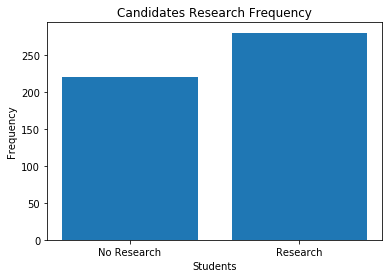

In [74]:
print("Not Having Research:",len(train[train["Research"]==0]))
print("Having Research:",len(train[train["Research"]==1]))
y=np.array([len(train[train["Research"]==0]),len(train[train["Research"]==1])])
x=["No Research","Research"]
plt.bar(x,y)
plt.xlabel("Students")
plt.ylabel("Frequency")
plt.title("Candidates Research Frequency")
plt.show()

In [75]:
train.groupby(["University Rating"]).count()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,,
1,34,34,34,34,34,34,34,34
2,126,126,126,126,126,126,126,126
3,162,162,162,162,162,162,162,162
4,105,105,105,105,105,105,105,105
5,73,73,73,73,73,73,73,73


In [85]:
train[["CGPA","University Rating"]].groupby(["University Rating"]).median()

,CGPA
University Rating,
1,7.740
2,8.170
3,8.545
4,9.020
5,9.300


Text(0.5, 1.0, 'CGPA vs University Rating')

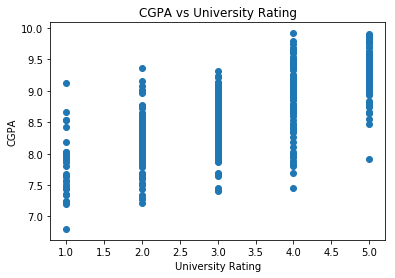

In [77]:
plt.scatter(train["University Rating"],train["CGPA"])
plt.xlabel("University Rating")
plt.ylabel("CGPA")
plt.title("CGPA vs University Rating")

In [78]:
train[["Chance of Admit ","University Rating"]].groupby(["University Rating"]).median()

,Chance of Admit
University Rating,
1,0.57
2,0.64
3,0.72
4,0.82
5,0.91


Text(0.5, 1.0, 'Chance of Admit vs University Rating')

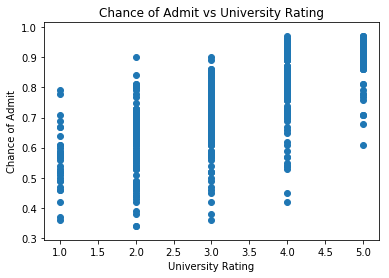

In [79]:
plt.scatter(train["University Rating"],train["Chance of Admit "])
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.title("Chance of Admit vs University Rating")

Text(0.5, 1.0, 'CGPA vs GRE Score')

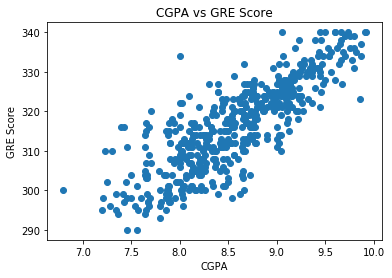

In [80]:
plt.scatter(train["CGPA"],train["GRE Score"])
plt.xlabel("CGPA")
plt.ylabel("GRE Score")
plt.title("CGPA vs GRE Score")

In [81]:
train[["Research","Chance of Admit "]].groupby(["Research"]).median()

,Chance of Admit
Research,
0,0.645
1,0.800


Text(0.5, 1.0, 'Chance of Admit vs Toefl Score')

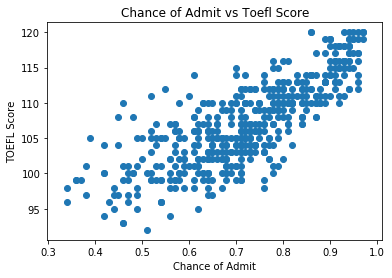

In [82]:
plt.scatter(train["Chance of Admit "],train["TOEFL Score"])
plt.xlabel("Chance of Admit")
plt.ylabel("TOEFL Score")
plt.title("Chance of Admit vs Toefl Score")

Text(0.5, 1.0, 'Chance of Admit vs GRE Score')

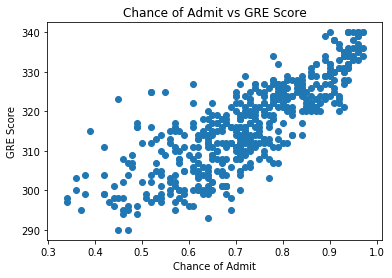

In [83]:
plt.scatter(train["Chance of Admit "],train["GRE Score"])
plt.xlabel("Chance of Admit")
plt.ylabel("GRE Score")
plt.title("Chance of Admit vs GRE Score")

In [87]:
test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [90]:
tr_re=pd.get_dummies(train["Research"],drop_first=True)
te_re=pd.get_dummies(test["Research"],drop_first=True)

In [91]:
train=pd.concat([train,tr_re],axis=1)
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,1
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [92]:
test=pd.concat([test,te_re],axis=1)
test.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,1
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,1
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [97]:
scalerX = MinMaxScaler(feature_range=(0, 1))
train[train.columns] = scalerX.fit_transform(train[train.columns])
test[test.columns] = scalerX.transform(test[test.columns])

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [98]:
print(train.columns)
print("************")
print(test.columns)

Index([       'Serial No.',         'GRE Score',       'TOEFL Score',
       'University Rating',               'SOP',              'LOR ',
                    'CGPA',          'Research',  'Chance of Admit ',
                         1],
      dtype='object')
************
Index([       'Serial No.',         'GRE Score',       'TOEFL Score',
       'University Rating',               'SOP',              'LOR ',
                    'CGPA',          'Research',  'Chance of Admit ',
                         1],
      dtype='object')


In [99]:
X=train.drop(['Serial No.','Research',  'Chance of Admit '],axis=1)
y=train['Chance of Admit ']

In [100]:
model=LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
X2=test.drop(['Serial No.','Research',  'Chance of Admit '],axis=1)
y2=test['Chance of Admit ']

In [102]:
y_pred=model.predict(X2)

In [104]:
y_pred

array([0.97124289, 0.73655767, 0.49753669, 0.64209413, 0.4627772 ,
       0.84840229, 0.58529665, 0.4072828 , 0.33393531, 0.59786794,
       0.62270965, 0.78747428, 0.81362505, 0.48217172, 0.48148817,
       0.48833562, 0.59580852, 0.50434341, 0.63077824, 0.49361958,
       0.44003395, 0.57405428, 0.93175646, 0.98688756, 0.98230127,
       0.98894698, 0.67166908, 0.28405607, 0.13664964, 0.23431986,
       0.41545075, 0.59784879, 0.92343819, 0.94785131, 0.97682472,
       0.82532566, 0.49925418, 0.31454345, 0.26162505, 0.38675432,
       0.48827237, 0.50207924, 0.54504205, 0.79676807, 0.86581797,
       0.78567449, 0.88578727, 0.94841552, 0.73986819, 0.65882898,
       0.54410469, 0.43610019, 0.6021191 , 0.56039241, 0.50311033,
       0.39659016, 0.32148913, 0.26158777, 0.14379244, 0.44848889,
       0.41664598, 0.44589514, 0.48131791, 0.58147849, 0.64790879,
       0.70434867, 0.71378939, 0.62285741, 0.7693765 , 0.82600714,
       0.97868325, 0.98657594, 0.87966334, 0.7312911 , 0.67113

In [106]:
metrics.mean_squared_error(y2,y_pred)

0.01007967709312662

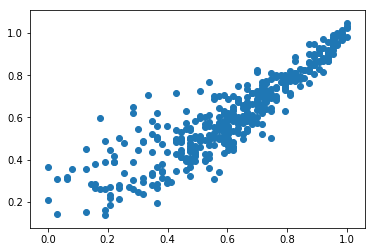

In [110]:
plt.scatter(y2,y_pred)
